<a href="https://colab.research.google.com/github/bibhabasuiitkgp/Quantum_Neural_Network_on_MNIST/blob/main/Qnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q tensorflow_quantum

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 598.8/598.8 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 68.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.0+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.0+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.0+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.0+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platfo

In [2]:
!pip install cirq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.7/532.7 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.5/596.5 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.8/223.8 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 15.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━

In [106]:
import tensorflow as tf

# Data Processing tools
import numpy as np
from sklearn.model_selection import train_test_split

# QML tools
import tensorflow_quantum as tfq
import cirq
import sympy

# Visualization Tools
from cirq.contrib.svg import SVGCircuit
import matplotlib.pyplot as plt

In [107]:
print("We are using the TensorFlow-Quantum version {}".format(tfq.__version__))
print("We are using the Cirq version {}".format(cirq.__version__))

We are using the TensorFlow-Quantum version 0.7.2
We are using the Cirq version 1.4.0


In [108]:
from tensorflow.keras.datasets import fashion_mnist as dataset

In [109]:
(X_train, y_train), (X_test, y_test) = dataset.load_data()

In [110]:
print("The shape of the X_train is {}".format( X_train.shape))
print("The shape of the y_train is {}".format(y_train.shape))
print("The shape of the X_test is {}".format(X_test.shape))
print("The shape of the y_test is {}".format(y_test.shape))

The shape of the X_train is (60000, 28, 28)
The shape of the y_train is (60000,)
The shape of the X_test is (10000, 28, 28)
The shape of the y_test is (10000,)


In [111]:
def filter_data(x, y):
  """
  Helper Function to filter the dataset
  """
  #filter the data using labels
  keep = (y == 5) | (y == 9)
  x, y = x[keep], y[keep]

  y = y == 5
  return x,y

In [112]:
#Filter the train set
X_train, y_train = filter_data(X_train, y_train)

#Filter the test_set
X_test, y_test = filter_data(X_test, y_test)

In [113]:
print("The shape of the X_train is {}".format( X_train.shape))
print("The shape of the y_train is {}".format(y_train.shape))
print("The shape of the X_test is {}".format(X_test.shape))
print("The shape of the y_test is {}".format(y_test.shape))

The shape of the X_train is (12000, 28, 28)
The shape of the y_train is (12000,)
The shape of the X_test is (2000, 28, 28)
The shape of the y_test is (2000,)


The First Image has the label False


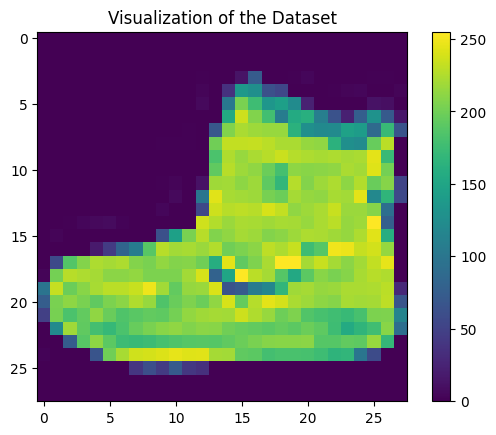

In [114]:
print("The First Image has the label {}".format(y_train[0]))
plt.imshow(X_train[0])
plt.colorbar()
plt.title('Visualization of the Dataset')
plt.show()


In [115]:
#Normalizing the train and test image data
X_train = X_train/255.0
X_test = X_test/ 255.0

The First Image has the label False


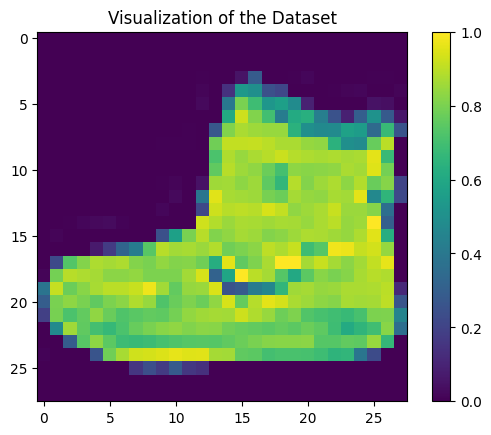

In [116]:
print("The First Image has the label {}".format(y_train[0]))
plt.imshow(X_train[0])
plt.colorbar()
plt.title('Visualization of the Dataset')
plt.show()

In [117]:

X_train = X_train.reshape(X_train.shape[0], *(28,28,1))
X_test = X_test.reshape(X_test.shape[0], *(28,28,1))

In [118]:
X_train = tf.image.resize(X_train, (2,2)).numpy()
X_test = tf.image.resize(X_test, (2,2)).numpy()

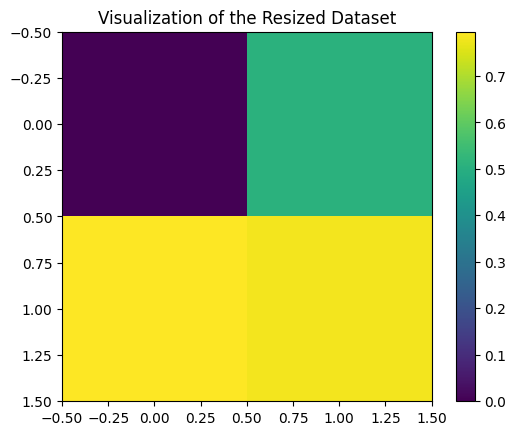

In [119]:
plt.imshow(X_train[0])
plt.colorbar()
plt.title('Visualization of the Resized Dataset')
plt.show()

In [120]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.15, random_state=0)


In [121]:

print("The shape of the X_train is {}".format(X_train.shape))
print("The shape of the y_train is {}".format(y_train.shape))
print("The shape of the X_valid is {}".format(X_valid.shape))
print("The shape of the y_valid is {}".format(y_valid.shape))

The shape of the X_train is (10200, 2, 2, 1)
The shape of the y_train is (10200,)
The shape of the X_valid is (1800, 2, 2, 1)
The shape of the y_valid is (1800,)


In [122]:
X_train = X_train.reshape(X_train.shape[0], *(1,4,1))
X_valid = X_valid.reshape(X_valid.shape[0], *(1,4,1))
X_test = X_test.reshape(X_test.shape[0], *(1,4,1))

In [123]:
print(X_train[0])

[[[0.        ]
  [0.41568628]
  [0.7137255 ]
  [0.73921573]]]


In [124]:
def binary_encode(X,threshold=0.5):

  encoded_images = list()
  for image in X:
    # pixel value is 1 if it's greater than threshold or else zero
    encoded_image = [1 if j>threshold else 0 for j in image[0]]
    encoded_images.append(encoded_image)
  return np.array(encoded_images)

In [125]:
X_train

array([[[[0.        ],
         [0.41568628],
         [0.7137255 ],
         [0.73921573]]],


       [[[0.        ],
         [0.90588236],
         [0.7882353 ],
         [0.8686274 ]]],


       [[[0.        ],
         [0.9137255 ],
         [0.4009804 ],
         [0.83431375]]],


       ...,


       [[[0.        ],
         [0.7382353 ],
         [0.6970588 ],
         [0.7166667 ]]],


       [[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ]]]], dtype=float32)

In [126]:
X_train.shape

(10200, 1, 4, 1)

In [127]:
X_train = binary_encode(X_train)


In [128]:
print(X_train[5])

[0 1 1 1]


In [129]:
print("The shape of the X_train is {}".format(X_train.shape))


The shape of the X_train is (10200, 4)


In [130]:
def create_circuit_from_image(encoded_image):

  qubits = cirq.GridQubit.rect(2,2)
  circuit = cirq.Circuit()
  for i, pixel in enumerate(encoded_image):
    if pixel:
      circuit.append(cirq.X(qubits[i]))
  return circuit

Suppose encoded_image = [0, 0, 1, 1]:

qubits would be [cirq.GridQubit(0, 0), cirq.GridQubit(0, 1), cirq.GridQubit(1, 0), cirq.GridQubit(1, 1)].
The loop iterates over encoded_image:

For i=0, pixel=0: No gate is appended.

For i=1, pixel=0: No gate is appended.

For i=2, pixel=1: An X gate is appended to cirq.GridQubit(1, 0).

For i=3, pixel=1: An X gate is appended to cirq.GridQubit(1, 1).

In [131]:
X_train = [create_circuit_from_image(encoded_image) for encoded_image in X_train]

In [138]:
print(X_train[0])
print()
print()
print(X_train[5])
print()
print()
print(X_train[6])

(1, 0): ───X───

(1, 1): ───X───


(0, 1): ───X───

(1, 0): ───X───

(1, 1): ───X───


(0, 1): ───X───

(1, 0): ───X───


In [139]:
X_train_tfq = tfq.convert_to_tensor(X_train)

In [140]:
X_valid = binary_encode(X_valid)
X_test = binary_encode(X_test)

In [141]:
X_valid = [create_circuit_from_image(encoded_image) for encoded_image in X_valid]
X_test = [create_circuit_from_image(encoded_image) for encoded_image in X_test]

In [142]:
X_valid_tfq = tfq.convert_to_tensor(X_valid)
X_test_tfq = tfq.convert_to_tensor(X_test)

In [143]:
class QNN():
    def __init__(self, data_qubits, readout):
      self.data_qubits = data_qubits
      self.readout = readout

    def add_singleQubit_gate(self,circuit, gate, qubit_index):

      for index in qubit_index:
        circuit.append(gate(self.data_qubits[index]))

    def add_twoQubit_gate(self,circuit, gate, qubit_index):

      if len(qubit_index)!=2:
        raise Exception("The length of the list of indices passed for two qubit \
        gate operations must be equal to two")
      circuit.append(gate(self.data_qubits[qubit_index[0]], self.data_qubits[qubit_index[1]]))

    def add_layer(self, circuit, gate, symbol_gate):

      for i, qubit in enumerate(self.data_qubits):
        symbol = sympy.Symbol(symbol_gate+ '-' + str(i))
        circuit.append(gate(qubit, self.readout)**symbol)


In [156]:
def create_qnn():
    """Create a QNN model circuit and readout operation to go along with it."""
    data_qubits = cirq.GridQubit.rect(2,2)  # a 4x4 grid.
    readout = cirq.GridQubit(-1, -1)         # a single qubit at [-1,-1]
    circuit = cirq.Circuit()

    # Prepare the readout qubit.
    circuit.append(cirq.X(readout))
    circuit.append(cirq.H(readout))

    qnn = QNN(
        data_qubits = data_qubits,
        readout=readout)


    # Add the coupling XX gate
    qnn.add_layer(circuit, cirq.XX, "xx")
    qnn.add_layer(circuit, cirq.ZZ, "zz")

    # Finally, prepare the readout qubit.
    circuit.append(cirq.H(readout))

    return circuit, cirq.Z(readout)

In [158]:
qmodel, model_readout = create_qnn()

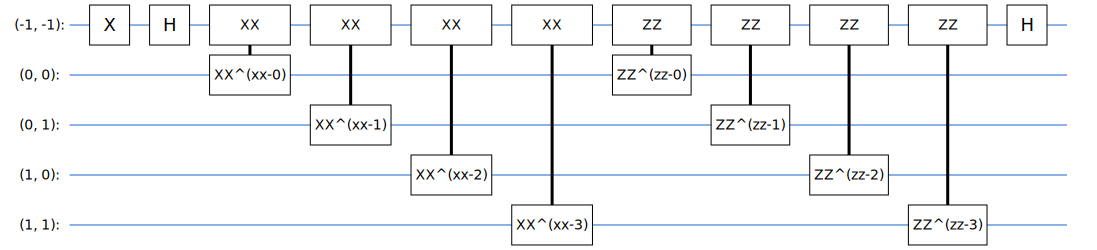

In [159]:
SVGCircuit(qmodel)

In [160]:
model_readout

cirq.Z(cirq.GridQubit(-1, -1))

In [161]:
model = tf.keras.Sequential([

    # The input is the data-circuit, encoded as a tf.string
    tf.keras.layers.Input(shape=(), dtype=tf.string),


    # The PQC stands for Paramaterized Quantum Circuit
    # This returns the expectation value
    tfq.layers.PQC(qmodel, model_readout),
])

In [162]:
y_train_h = np.array([1 if i==1 else -1 for i in y_train ])
y_valid_h = np.array([1 if i==1 else -1 for i in y_valid ])
y_test_h = np.array([1 if i==1 else -1 for i in y_test ])


In [163]:
print(y_train_h[0])

1


In [164]:
def hinge_accuracy(y_true, y_pred):
    y_true = tf.squeeze(y_true) > 0.0
    y_pred = tf.squeeze(y_pred) > 0.0
    result = tf.cast(y_true == y_pred, tf.float32)

    return tf.reduce_mean(result)

In [165]:
model.compile(
    loss=tf.keras.losses.Hinge(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[hinge_accuracy])

In [171]:
qnn_history = model.fit(
      X_train_tfq, y_train_h,
      batch_size=64,
      epochs=15,
      verbose=1,
      validation_data=(X_valid_tfq, y_valid_h))

Epoch 1/15
160/160 [==============================] - 9s 55ms/step - loss: 0.3952 - hinge_accuracy: 0.8023 - val_loss: 0.4108 - val_hinge_accuracy: 0.7958
Epoch 2/15
160/160 [==============================] - 8s 51ms/step - loss: 0.3951 - hinge_accuracy: 0.8022 - val_loss: 0.4114 - val_hinge_accuracy: 0.7958
Epoch 3/15
160/160 [==============================] - 9s 55ms/step - loss: 0.3951 - hinge_accuracy: 0.8025 - val_loss: 0.4113 - val_hinge_accuracy: 0.7958
Epoch 4/15
160/160 [==============================] - 8s 50ms/step - loss: 0.3951 - hinge_accuracy: 0.8027 - val_loss: 0.4115 - val_hinge_accuracy: 0.7958
Epoch 5/15
160/160 [==============================] - 9s 57ms/step - loss: 0.3950 - hinge_accuracy: 0.8020 - val_loss: 0.4118 - val_hinge_accuracy: 0.7958
Epoch 6/15
160/160 [==============================] - 10s 64ms/step - loss: 0.3950 - hinge_accuracy: 0.8023 - val_loss: 0.4118 - val_hinge_accuracy: 0.7958
Epoch 7/15
160/160 [==============================] - 9s 54ms/step - 

In [172]:
model.evaluate(X_test_tfq, y_test_h)

63/63 [==============================] - 1s 16ms/step - loss: 0.3569 - hinge_accuracy: 0.8229


[0.35689911246299744, 0.8229166865348816]

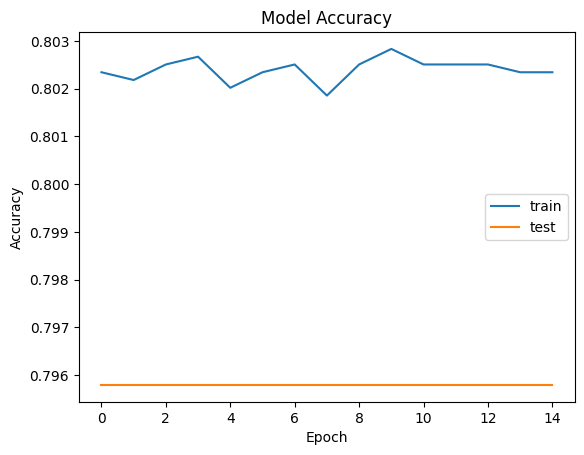

In [173]:
plt.plot(qnn_history.history['hinge_accuracy'])
plt.plot(qnn_history.history['val_hinge_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train','test'],loc="best")
plt.show()

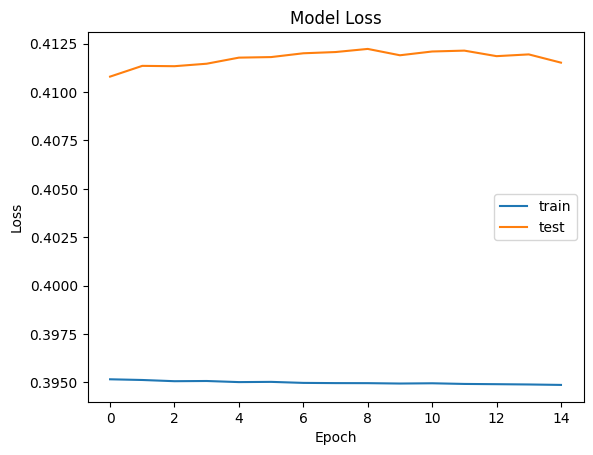

In [174]:
plt.plot(qnn_history.history['loss'])
plt.plot(qnn_history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train','test'],loc="best")
plt.show()